<a href="https://colab.research.google.com/github/AteneaCB/Python/blob/main/M5Sesi%C3%B3n5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Módulo 5**
Machine Learning

**Sesión 5**
Árboles de decisión

**Ejemplo 1**
Adivina quién

In [1]:
#Librerías
import numpy as np
import pandas as pd

In [ ]:
y = ["Antonio", "Elly", "Patricia", "María", "Juana", "José", "Luis"]

#Cabello largo | Usa lentes | Usa sombrero | Es mujer | Tiene bigote | Tiene ojos claros
x = np.array([
     [0,1,0,0,0,0], #Antonio: No tiene cabello largo, usa lentes, no usa sombrero, no es mujer, no tiene bigote, no tiene ojos claros
     [1,1,1,1,0,0], #Elly: Tiene cabello largo, usa lentes, usa sombrero, es mujer, no tiene bigote, no tiene ojos claros
     [0,0,1,1,0,1], #Patricia: ...
     [1,1,0,1,0,0], #Maria: ...
     [0,0,1,1,0,0], #Juana: ...
     [1,0,0,0,1,1], #José: ...
     [0,1,1,0,0,1]  #Luis: ...
    ], dtype=np.int16)

In [ ]:
adivina_quien = [True]*len(y)
print(adivina_quien)

[True, True, True, True, True, True, True]


In [ ]:
#Revisa a los individuos
print("Quien queda:")
for i in range(len(adivina_quien)):
    if(adivina_quien[i] == True):
      print(y[i])

Quien queda:
Antonio
Elly
Patricia
María
Juana
José
Luis


In [ ]:
#Preguntas de características
cabello = 1
pregunta1 = np.where(x[:,0] == cabello, True, False)
print(pregunta1)

[False  True False  True False  True False]


In [ ]:
print("Quien queda:")
for i in range(len(pregunta1)):
    if(pregunta1[i] == True):
      print(y[i])

Quien queda:
Elly
María
José


In [ ]:
#Pregunta 2
lentes = 1
pregunta2 = np.where(x[:,1] == lentes, True, False)
print(pregunta2)

[ True  True False  True False False  True]


In [ ]:
print("Quien queda:")
for i in range(len(pregunta2)):
    if(pregunta2[i] == True):
      print(y[i])

Quien queda:
Antonio
Elly
María
Luis


In [ ]:
#Opción sobreescribiendo
adivina_quien1 = pregunta1
print(adivina_quien1)

[False  True False  True False  True False]


In [ ]:
print("Quien queda:")
for i in range(len(adivina_quien1)):
    if(adivina_quien1[i] == True):
      print(y[i])

Quien queda:
Elly
María
José


In [ ]:
#Pregunta 2
lentes = 1
pregunta2 = np.where(x[:,1] == lentes, True, False)
                           
for i in range(len(adivina_quien1)):
  adivina_quien1[i] = pregunta2[i] and adivina_quien1[i]
print(adivina_quien1)

[False  True False  True False False False]


In [ ]:
print("Quien queda:")
for i in range(len(adivina_quien1)):
    if(adivina_quien1[i] == True):
      print(y[i])

Quien queda:
Elly
María


**Reto 01**

Árbol de decisión, encontrar al ladrón.

Eres un detective y debes encontrar al culpable de hcer robado del museo del Louvre una importante obra artística valuada en varios millones de euros. El ladrón, que entró en la noche a las instalaciones del múseo, fue visto salir con el motín por un testigo que estaba pasando la calle al momento de la huida del delincuente. El testigo le dijo a la policía que el ladrón presentaba las siguientes señas particulares:

- Tiene un tatuaje en la muñeca
- No tenía perforaciones visibles
- Su cabello era negro
- Usaba botas
- Medía más de 1.80, aproximadamente
- Era de tez blanca

En la base de datos de la estación de Policia se encontraron los expedientes de 7 sospechosos. Tu deber es hacer las preguntas correctas para hayar al culpable entre los probables malhechores.

Los sospechosos, y sus respectivas características son:

- Manuel: No tatuaje | Sin perforaciones | No cabello negro | No botas | Si mide más de 1.80 | Si tez blanca
- Pedro: Si tatuaje | Sin perforaciones | Si cabello negro | Si botas | Si mide más de 1.80 | Si tez blanca
- Akira: Si tatuaje | Sin perforaciones | Si cabello negro | No botas | Si mide más de 1.80 | Si tez blanca
- Mauricio: Si tatuaje | Sin perforaciones | No cabello negro | No botas | Si mide más de 1.80 | Si tez blanca
- Heriberto: Si tatuaje | Con perforaciones | No cabello negro | No botas | No mide más de 1.80 | No tez blanca
- Yony: Si tatuaje | Sin perforaciones | No cabello negro | No botas | Si mide más de 1.80 | No tez blanca
- Juan: Si tatuaje | Sin perforaciones | No cabello negro | No botas | No mide más de 1.80 | No tez blanca

**Paso 01**
Definir una variable 'sospechosos' para el output con forma de lista, con los nombres de los sospechosos.

In [ ]:
sospechosos = ["Manuel", "Pedro", "Akira", "Mauricio", "Heriberto", "Yony", "Juan"]

**Paso 02**
Generar un array llamado 'binaria' de numpy con una binarización (1 para si cuenta con la característica, 0 para no cuenta con ella), donde cada fila corresponde a un sospechoso

In [ ]:
# Tatuaje | Perforaciones | Cabello negro | Botas | Mide más de 1.80 | Tez blanca
binaria = np.array([
     [0,0,0,0,1,1], #Manuel
     [1,0,1,1,1,1], #Pedro
     [1,0,1,0,1,1], #Akira
     [1,0,0,0,1,1], #Mauricio
     [1,1,0,0,0,0], #Heriberto
     [1,0,0,0,1,0], #Yony
     [1,0,0,0,0,0]  #Juan
    ], dtype=np.int16)

**Paso 03**
Verifique que todos los acusados son sospechosos mediante una variable que se llame 'SospechososTodos' igual a operación básica que multiplique un boolean con cada observación de y (nombres)

In [ ]:
sospechosos_todos = [True]*len(sospechosos)
print(sospechosos_todos)

[True, True, True, True, True, True, True]


**Paso 04**
Con un loop básico, despliegue en pantalla que sospechosos hay

In [ ]:
#Revisa a los individuos
print("Sospechosos:")
for i in range(len(sospechosos_todos)):
    if(sospechosos_todos[i] == True):
      print(sospechosos[i])

Sospechosos:
Manuel
Pedro
Akira
Mauricio
Heriberto
Yony
Juan


**Paso 05**
Empiece el interrogatorio con la primera pregunta: Tienen tatuajes en la muñeca?
- Hagalo definiendo una variable llamada 'pregunta1' que contenga np.where.
- Como pista: use la binarización deifnida en el paso 02, e inicie con una variable predefinida como TieneTatuajesEnLaMuñeca = 1

In [ ]:
#Pregunta 1, tatuajes
tatuajes = 1
pregunta_1 = np.where(binaria[:,0] == tatuajes, True, False)
print(pregunta_1)

[False  True  True  True  True  True  True]


**Paso 06**
Repita el paso 04 para ver que malhechores quedan:

In [ ]:
print("Sospechosos:")
for i in range(len(pregunta_1)):
    if(pregunta_1[i] == True):
      print(sospechosos[i])

Sospechosos:
Pedro
Akira
Mauricio
Heriberto
Yony
Juan


**Paso 07**
Continue preguntando a los inculpados: Tienen perforaciones visibles?

**Paso 08**
 Repita el paso 04 y vea que malhechores quedan

**Paso 09**
Haga la siguiente pregunta: ¿Su cabello era negro? 

**Paso 10** 
Solo debe restarle 02 sospechosos. Haga la última pregunta y encuentre al último culpable: ¿Usaba botas? 

In [ ]:
#En una sóla operación
#Misma array de sospechosos y matriz binaria de características

#Array de descripción del sospechoso
descrito = np.array([1,0,1,1,1,1])

#Matriz resultado: multiplico para limpiar los resultados no probables
resultado = binaria*descrito

#Suma de resultados para cada elemento: 
sumatoria = [i.sum() for i in resultado]

#Índice del culpable, notemos que tiene que tener 5 como salida, ya que es la suma de características del culpable
culpable_index = sumatoria.index(descrito.sum())

#Imprimir el nombre del culpable: 
print(sospechosos[culpable_index])

Pedro


**Ejemplo 2**

Árboles de decisión

In [17]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(x,y)

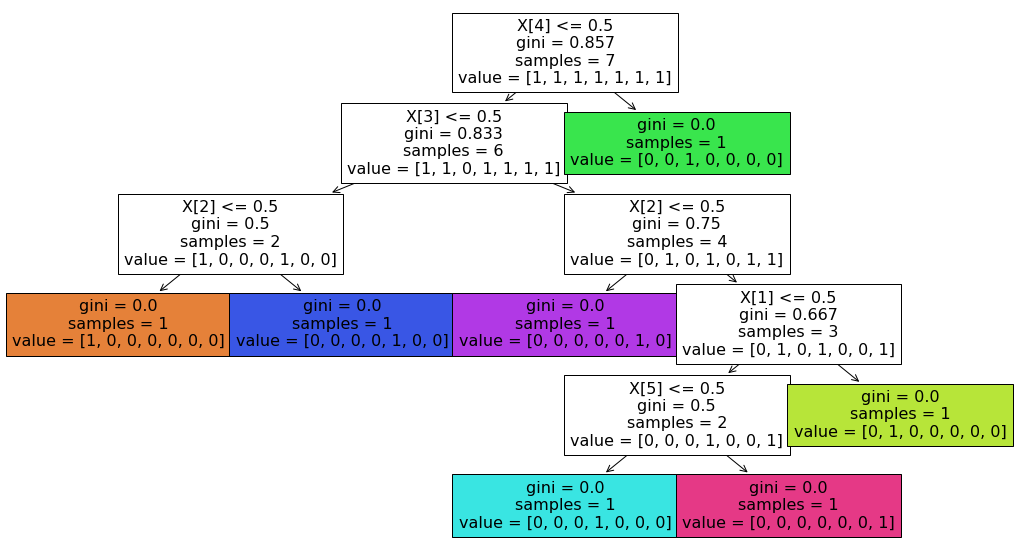

In [ ]:
#Visualización
plt.figure(figsize=(18,10))
tree.plot_tree(clf, filled=True)
plt.show()
#Los nodos finales están coloreados

**Reto 2**
Árboles de decisión

A continuación vas a retomar lo desarrollado en el reto 01 pero a continuación, el challenge consta de... ¡generar la visualización del árbol de decisión para el caso del ladrón de Louvre! Lee y sigue cuidadosamente las instrucciones

**Paso 1**
Declara dos variables:

- 'sospechosos', la cual definiste en el paso 01 del reto 01
- 'binaria', la cual definiste en el paso 02 del reto 01

In [3]:
sospechosos = ["Manuel", "Pedro", "Akira", "Mauricio", "Heriberto", "Yony", "Juan"]

# Tatuaje | Perforaciones | Cabello negro | Botas | Mide más de 1.80 | Tez blanca
binaria = np.array([
     [0,0,0,0,1,1], #Manuel
     [1,0,1,1,1,1], #Pedro
     [1,0,1,0,1,1], #Akira
     [1,0,0,0,1,1], #Mauricio
     [1,1,0,0,0,0], #Heriberto
     [1,0,0,0,1,0], #Yony
     [1,0,0,0,0,0]  #Juan
    ], dtype=np.int16)

**Paso 2**
Usa treeClassifier.DecisionTreeClassifier() dentro de una variable que tú definas, y despues haz un fit con las variables que acabas de definir llamadas 'binaria' y 'sospechosos'

In [7]:
arbol = DecisionTreeClassifier()
arbol_d = arbol.fit(binaria, sospechosos)

**Paso 3**
Usa matplotlib, en específico treeClassifier.plot_tree y usa como argumento la variable que definiste en el paso anterior (en la cual usaste treeClassifier.DecisionTreeClassifier() )

[Text(434.00000000000006, 398.64, 'X[3] <= 0.5\ngini = 0.857\nsamples = 7\nvalue = [1, 1, 1, 1, 1, 1, 1]'),
 Text(347.20000000000005, 326.15999999999997, 'X[0] <= 0.5\ngini = 0.833\nsamples = 6\nvalue = [1, 1, 1, 1, 1, 0, 1]'),
 Text(260.40000000000003, 253.67999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1, 0, 0, 0]'),
 Text(434.00000000000006, 253.67999999999998, 'X[5] <= 0.5\ngini = 0.8\nsamples = 5\nvalue = [1, 1, 1, 0, 1, 0, 1]'),
 Text(260.40000000000003, 181.2, 'X[4] <= 0.5\ngini = 0.667\nsamples = 3\nvalue = [0, 1, 1, 0, 0, 0, 1]'),
 Text(173.60000000000002, 108.71999999999997, 'X[1] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1, 0, 0, 0, 0]'),
 Text(86.80000000000001, 36.23999999999995, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0, 0]'),
 Text(260.40000000000003, 36.23999999999995, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0, 0, 0, 0]'),
 Text(347.20000000000005, 108.71999999999997, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 0, 0, 1]'),
 Text(607.60

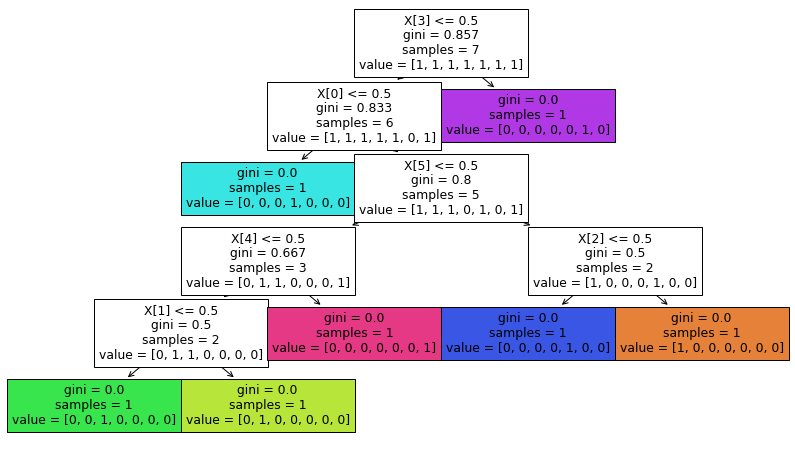

In [8]:
plt.figure(figsize=(14,8))
tree.plot_tree(arbol_d, filled=True)

**Paso 4**
Discutan en equipo la forma de interpretar este árbol de decisión dada la ofrecida por el profesor en el ejemplo 02:

- ¿Que pasa cuando samples es igual a 1 y se colorean esas hojas?
- ¿Cúal es el criterio de decisión?
- ¿Cómo puedo ir subiendo o bajando en el árbol?

In [9]:
binaria[1] <=0.5

array([False,  True, False, False, False, False])

**Ejemplo 3**

In [18]:
#Librerías específicas
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier as forest

In [20]:
y = ["Antonio", "Elly", "Patricia", "María", "Juana", "José", "Luis"]

#Características: 
#Cabello largo | Usa lentes | Usa sombrero | Es mujer | Tiene bigote | Tiene ojos claros
x = np.array([
     [0,1,0,0,0,0], #Antonio: No tiene cabello largo, usa lentes, no usa sombrero, no es mujer, no tiene bigote, no tiene ojos claros
     [1,1,1,1,0,0], #Elly: Tiene cabello largo, usa lentes, usa sombrero, es mujer, no tiene bigote, no tiene ojos claros
     [0,0,1,1,0,1], #Patricia: ...
     [1,1,0,1,0,0], #Maria: ...
     [0,0,1,1,0,0], #Juana: ...
     [1,0,0,0,1,1], #José: ...
     [0,1,1,0,0,1]  #Luis: ...
    ], dtype=np.int16)

In [21]:
decision = tree.DecisionTreeClassifier(random_state = 50)
decision = decision.fit(x,y)

In [22]:
char = np.array([[1,1,1,0,1,1]], dtype = np.int16) # Jose
print("El personaje que sabemos puedde tener lentes y sombrero seria")
print(decision.predict(char))

El personaje que sabemos puedde tener lentes y sombrero seria
['Luis']


In [23]:
char = np.array([[1,1,0,0,1,1]], dtype = np.int16) # Jose
print("El personaje que sabemos puedde tener lentes y sombrero seria")
print(decision.predict(char))

El personaje que sabemos puedde tener lentes y sombrero seria
['José']


In [24]:
char = np.array([[1,0,1,0,1,1]], dtype = np.int16) # Jose
print("El personaje que sabemos puedde tener lentes y sombrero seria")
print(decision.predict(char))

El personaje que sabemos puedde tener lentes y sombrero seria
['Luis']


In [25]:
arboles = forest(n_estimators= 2000, random_state = 50)
arboles.fit(x,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2000,
                       n_jobs=None, oob_score=False, random_state=50, verbose=0,
                       warm_start=False)

In [26]:
print("El adivinado que arroja el bosque sería")
print(arboles.predict(np.array([[1,1,1,0,1,1]], dtype = np.int16)))

El adivinado que arroja el bosque sería
['Luis']


In [27]:
print("El adivinado que arroja el bosque sería")
print(arboles.predict(np.array([[1,1,0,0,1,1]], dtype = np.int16)))

El adivinado que arroja el bosque sería
['José']


In [28]:
print("El adivinado que arroja el bosque sería")
print(arboles.predict(np.array([[1,0,1,0,1,1]], dtype = np.int16)))

El adivinado que arroja el bosque sería
['José']
